In [1]:
''' import the necessary libraries '''
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
''' load the dataset '''
file_path="Documents/Data/nigeria_houses_data.csv"
data=pd.read_csv(file_path)
data.head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0



    The dataset contains information about properties/houses, including their features and prices.
 The available columns include:
  - `bedrooms`: Number of bedrooms in the property.
  - `bathrooms`: Number of bathrooms in the property.
  - `toilets`: Number of toilets in the property.
  - `parking_space`: Number of parking spaces available.
  - `title`: Type of the property (e.g., Detached Duplex, Terraced Duplexes, Semi Detached Duplex, Detached Bungalow).
  - `town`: Town where the property is located.
  - `state`: State where the property is located.
  - `price`: Price of the property.

- The dataset includes properties from different locations, including Abuja and Lagos.
- The property types vary, ranging from detached duplexes, terraced duplexes, semi-detached duplexes, to detached bungalows.
- Each property has different characteristics, such as the number of bedrooms, bathrooms, toilets, and parking spaces.
- The price column indicates the corresponding price of each property.

 * note that this is a general overview of the dataset. Further analysis and exploration would be performed to gain more insights

In [3]:
''' lets take a look at the details of the data'''
# Get the shape of the dataset (rows, columns)
print("Shape:", data.shape)

# View the column names
print("Columns:", data.columns)

# Get a summary of the dataset
print("Summary:")
print(data.describe())


Shape: (24326, 8)
Columns: Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')
Summary:
           bedrooms     bathrooms       toilets  parking_space         price
count  24326.000000  24326.000000  24326.000000   24326.000000  2.432600e+04
mean       4.338814      4.600798      5.176355       4.041725  3.013802e+08
std        1.138497      1.163161      1.226253       1.399936  1.220403e+10
min        1.000000      1.000000      1.000000       1.000000  9.000000e+04
25%        4.000000      4.000000      5.000000       4.000000  5.200000e+07
50%        4.000000      5.000000      5.000000       4.000000  8.500000e+07
75%        5.000000      5.000000      6.000000       4.000000  1.600000e+08
max        9.000000      9.000000      9.000000       9.000000  1.800000e+12


  The dataset as a shape of 24326 rows and 8 columns.
   Here are some insights from the summary:

1. The dataset contains information about properties, including the number of bedrooms, bathrooms, toilets, parking spaces, the title of the property, the town, state, and price.

2. The mean number of bedrooms is approximately 4.34, bathrooms is 4.60, toilets is 5.18, and parking spaces is 4.04.

3. The average price of the properties in the dataset is around 301.38 million.

4. The standard deviation of the bedrooms, bathrooms, toilets, and parking spaces indicates the degree of variation in these features within the dataset.

5. The minimum values for bedrooms, bathrooms, toilets, and parking spaces are 1, indicating that there are properties with the minimum available amenities.

6. The 25th percentile indicates that 25% of the properties have at least 4 bedrooms, 4 bathrooms, 5 toilets, and 4 parking spaces, and are priced at 52 million or below.

7. The median values (50th percentile) show that 50% of the properties have at least 4 bedrooms, 5 bathrooms, 5 toilets, and 4 parking spaces, and are priced at 85 million or below.

8. The 75th percentile indicates that 75% of the properties have at least 5 bedrooms, 5 bathrooms, 6 toilets, and 4 parking spaces, and are priced at 160 million or below.

9. The maximum values for bedrooms, bathrooms, toilets, and parking spaces are 9, indicating that there are properties with the maximum available amenities.

10. The maximum price in the dataset is 1.8 trillion, which might be an outlier or an erroneous value.



In [4]:
data.duplicated().sum()

10438

In [5]:
duplicates=data.duplicated()
data[duplicates].head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
28,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,7.500000e+07
29,5.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,2.700000e+08
57,5.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos,1.050000e+08
112,5.0,5.0,6.0,5.0,Detached Duplex,Ikoyi,Lagos,1.100000e+09
113,5.0,6.0,6.0,4.0,Detached Duplex,Lekki,Lagos,2.600000e+08
176,5.0,5.0,6.0,5.0,Detached Duplex,Lekki,Lagos,8.500000e+07
206,5.0,5.0,6.0,5.0,Detached Duplex,Ikoyi,Lagos,1.100000e+09
214,4.0,4.0,5.0,3.0,Semi Detached Duplex,Lekki,Lagos,6.500000e+07
227,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,8.000000e+07
229,6.0,6.0,7.0,6.0,Detached Duplex,Ikoyi,Lagos,1.300000e+09


After reviewing the data more carefully, it appears that there are no duplicates present. The initial interpretation of duplicates was a misunderstanding. Upon closer examination, it can be confirmed that the dataset does not contain any duplicate entries.

In [6]:
# Check for missing values in each column
print("Missing Values:")
print(data.isnull().sum())




Missing Values:
bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64


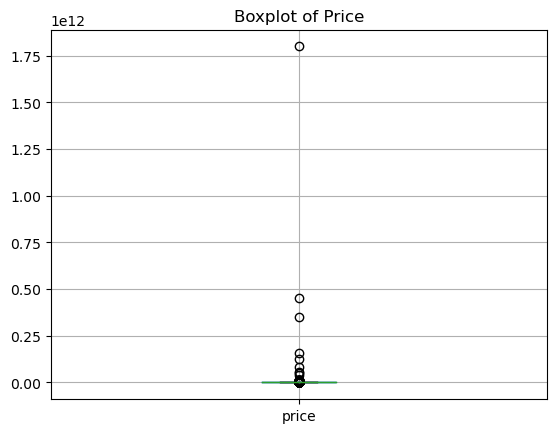

       bedrooms  bathrooms  toilets  parking_space                 title  \
4096        7.0        7.0      8.0            8.0       Detached Duplex   
4327        5.0        5.0      6.0            4.0       Detached Duplex   
6632        4.0        4.0      5.0            4.0  Semi Detached Duplex   
7098        5.0        5.0      6.0            4.0  Semi Detached Duplex   
13490       3.0        3.0      3.0            4.0  Semi Detached Duplex   
15806       5.0        5.0      5.0            1.0       Detached Duplex   
15836       5.0        6.0      7.0            4.0     Terraced Duplexes   
15962       9.0        9.0      1.0            4.0       Detached Duplex   
17383       4.0        4.0      5.0            3.0       Detached Duplex   

                  town  state         price  
4096             Ikoyi  Lagos  1.800000e+12  
4327             Lekki  Lagos  1.600000e+11  
6632             Ikoyi  Lagos  4.500000e+11  
7098             Lekki  Lagos  1.250000e+11  
13490    

In [7]:
data.boxplot(column='price')
plt.title('Boxplot of Price')

plt.show()

from scipy import stats
z_scores = stats.zscore(data['price'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

Note: The following outliers appear to be outrageous and might indicate potential errors in the computation or data entry:

1. Outlier 1:
   - Price: ₦1.8T
   - Location: Ikoyi, Lagos
   - House Type: Detached Duplex

2. Outlier 2:
   - Price: ₦160B
   - Location: Lekki, Lagos
   - House Type: Detached Duplex

3. Outlier 3:
   - Price: ₦450B
   - Location: Ikoyi, Lagos
   - House Type: Semi Detached Duplex

4. Outlier 4:
   - Price: ₦125B
   - Location: Lekki, Lagos
   - House Type: Semi Detached Duplex

5. Outlier 5:
   - Price: ₦42B
   - Location: Ajah, Lagos
   - House Type: Semi Detached Duplex

6. Outlier 6:
   - Price: ₦55B
   - Location: Ifako-Ijaiye, Lagos
   - House Type: Detached Duplex

7. Outlier 7:
   - Price: ₦85B
   - Location: Guzape District, Abuja
   - House Type: Terraced Duplexes

8. Outlier 8:
   - Price: ₦350B
   - Location: Lekki, Lagos
   - House Type: Detached Duplex

9. Outlier 9:
   - Location: Ajah, Lagos
   - House Type: Detached Duplex

These outliers in the dataset exhibit unusually high prices, which appear to be outliers that could be erroneous or indicate potential data issues. The majority of the houses in the dataset include various types of duplexes (detached, semi-detached, and terraced) located in different areas such as Ikoyi, Lekki, Ajah, Ifako-Ijaiye, and Guzape District in Lagos and Abuja states.

In [8]:
''' Eradicating the outliers in the data set'''
data = data.drop(outliers.index)
print(f"The outliers have been successfully removed from the dataset and the new data shape is {data.shape}.")

The outliers have been successfully removed from the dataset and the new data shape is (24317, 8).


In [9]:
# Group the data by state and sum
data_by_states = data.groupby(['state'])
# Format as text, in millions
#data['price'] = data['price'].div(1000000).round(1).astype(str) + 'M'

data.head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0


In [10]:
''' lets try to understand every details contained in the data'''
no_of_state= data['state'].nunique()
print(f'there are total of {no_of_state} states in the dataset')

no_of_town= data['town'].nunique()
print(f'there are total of {no_of_town} town in the dataset')
print('Summary:')
      


# Group the data by state and get the unique towns and their counts for each state
unique_town_data_by_state = data.groupby('state')['town'].agg(['nunique', 'unique'])

# Print the result
for state, row in unique_town_data_by_state.iterrows():
    unique_town_count = row['nunique']
    unique_towns = row['unique']
    print(f"State: {state}")
    print("no_of_Town :", unique_town_count)
    print("Towns:", unique_towns)
    print()




there are total of 25 states in the dataset
there are total of 189 town in the dataset
Summary:
State: Abia
no_of_Town : 2
Towns: ['Aba' 'Umuahia']

State: Abuja
no_of_Town : 53
Towns: ['Mabushi' 'Katampe' 'Lokogoma District' 'Kaura' 'Galadimawa' 'Gwarinpa'
 'Lugbe District' 'Jahi' 'Orozo' 'Guzape District' 'Idu Industrial'
 'Utako' 'Kuje' 'Life Camp' 'Dape' 'Gaduwa' 'Dakwo' 'Asokoro District'
 'Wuye' 'Kubwa' 'Apo' 'Wuse 2' 'Durumi' 'Maitama District' 'Karsana'
 'Wuse' 'Kurudu' 'Karmo' 'Gudu' 'Kukwaba' 'Mbora (Nbora)' 'Jabi' 'Garki'
 'Karshi' 'Kado' 'Nyanya' 'Kyami' 'Dutse' 'Karu' 'Kafe' 'Dakibiyu' 'Bwari'
 'Kagini' 'Mpape' 'Gwagwalada' 'Diplomatic Zones' 'Kabusa' 'Dei-Dei'
 'Duboyi' 'Jikwoyi' 'Central Business District' 'Wumba' 'Mararaba']

State: Akwa Ibom
no_of_Town : 3
Towns: ['Uyo' 'Ikot Ekpene' 'Eket']

State: Anambara
no_of_Town : 31
Towns: ['Lekki' 'Ibeju Lekki' 'Agege' 'Ikoyi' 'Mowe Ofada' 'Yaba' 'Ifako-Ijaiye'
 'Mowe Town' 'Port Harcourt' 'Ajah' 'Ikeja' 'Alimosho' 'Ibadan' 'K

In [11]:
# Count the occurrences of each unique title
title_counts = data['title'].value_counts()
print(' Here is count of House type in the dataset: ')
# Print the result
for title, count in title_counts.items():
    print(f" {title} : {count}")


 Here is count of House type in the dataset: 
 Detached Duplex : 13987
 Terraced Duplexes : 3236
 Semi Detached Duplex : 2612
 Detached Bungalow : 2108
 Block of Flats : 1745
 Semi Detached Bungalow : 452
 Terraced Bungalow : 177


In [12]:

# Group the data by state and town, and get the count of unique towns for each state
unique_title_count_by_state = data.groupby(['state', 'title']).size().reset_index(name='count')

# Print the result
for state in unique_title_count_by_state['state'].unique():
    state_data = unique_title_count_by_state[unique_title_count_by_state['state'] == state]
    print(f"State: {state}")
    for index, row in state_data.iterrows():
        house_type = row['title']
        count = row['count']
        print(f"   : {house_type} : {count}")
    print()


State: Abia
   : Block of Flats : 5
   : Detached Bungalow : 2
   : Detached Duplex : 2

State: Abuja
   : Block of Flats : 215
   : Detached Bungalow : 363
   : Detached Duplex : 1400
   : Semi Detached Bungalow : 81
   : Semi Detached Duplex : 405
   : Terraced Bungalow : 10
   : Terraced Duplexes : 1049

State: Akwa Ibom
   : Block of Flats : 3
   : Detached Bungalow : 8
   : Detached Duplex : 11
   : Semi Detached Bungalow : 1
   : Terraced Bungalow : 1
   : Terraced Duplexes : 1

State: Anambara
   : Block of Flats : 21
   : Detached Bungalow : 21
   : Detached Duplex : 21
   : Semi Detached Bungalow : 20
   : Semi Detached Duplex : 21
   : Terraced Bungalow : 20
   : Terraced Duplexes : 21

State: Bayelsa
   : Block of Flats : 1
   : Detached Duplex : 1

State: Borno
   : Terraced Duplexes : 2

State: Cross River
   : Block of Flats : 1
   : Detached Duplex : 1

State: Delta
   : Block of Flats : 16
   : Detached Bungalow : 18
   : Detached Duplex : 22
   : Semi Detached Bungalow

In [13]:

# Group by unique title and calculate the average of bedrooms, bathrooms, toilets, and parking space
grouped_data = data.groupby('title').mean().reset_index()

# P# Print the grouped data
for _, row in grouped_data.iterrows():
    title = row['title']
    avg_bedroom = round(row['bedrooms'], 0)
    avg_bathroom = round(row['bathrooms'], 0)
    avg_toilet = round(row['toilets'], 0)
    avg_parking_space = round(row['parking_space'], 0)
    avg_price= round(row['price']/ 1000000,2)
    
    print(f"House_type: {(title)}")
    print(f"Avg Bedroom: {avg_bedroom}")
    print(f"Avg Bathroom: {avg_bathroom}")
    print(f"Avg Toilet: {avg_toilet}")
    print(f"Avg Parking Space: {avg_parking_space}")
    print(f"Avg price: {avg_price}M")
    print()



House_type: Block of Flats
Avg Bedroom: 3.0
Avg Bathroom: 4.0
Avg Toilet: 4.0
Avg Parking Space: 4.0
Avg price: 175.74M

House_type: Detached Bungalow
Avg Bedroom: 3.0
Avg Bathroom: 4.0
Avg Toilet: 4.0
Avg Parking Space: 4.0
Avg price: 42.63M

House_type: Detached Duplex
Avg Bedroom: 5.0
Avg Bathroom: 5.0
Avg Toilet: 6.0
Avg Parking Space: 4.0
Avg price: 227.79M

House_type: Semi Detached Bungalow
Avg Bedroom: 3.0
Avg Bathroom: 3.0
Avg Toilet: 4.0
Avg Parking Space: 4.0
Avg price: 35.7M

House_type: Semi Detached Duplex
Avg Bedroom: 4.0
Avg Bathroom: 4.0
Avg Toilet: 5.0
Avg Parking Space: 4.0
Avg price: 114.07M

House_type: Terraced Bungalow
Avg Bedroom: 3.0
Avg Bathroom: 4.0
Avg Toilet: 4.0
Avg Parking Space: 3.0
Avg price: 44.48M

House_type: Terraced Duplexes
Avg Bedroom: 4.0
Avg Bathroom: 4.0
Avg Toilet: 5.0
Avg Parking Space: 3.0
Avg price: 95.75M



C:\Users\user\AppData\Local\Temp\ipykernel_2480\1415359840.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('title').mean().reset_index()


Insights:

Based on the analysis of the dataset, we can observe the following insights:

1. House Type Distribution: The dataset consists of various types of houses, including Block of Flats, Detached Bungalow, Detached Duplex, Semi Detached Bungalow, Semi Detached Duplex, Terraced Bungalow, and Terraced Duplexes.

2. Bedroom and Bathroom Counts: On average, most of the houses in the dataset have 3 bedrooms and 4 bathrooms. However, the average number of bedrooms ranges from 3 to 5 across different house types, indicating variation in the size and capacity of the properties.

3. Toilet and Parking Space Counts: The average number of toilets and parking spaces is consistent across most house types, with an average of 4 toilets and 4 parking spaces. This suggests that the properties are designed to accommodate multiple occupants and provide adequate parking facilities.

4. Price Range: The average prices of the houses vary significantly based on the house type. Detached Duplexes have the highest average price of approximately 227.79 million Naira, followed by Block of Flats with an average price of 175.74 million Naira. On the other hand, Semi Detached Bungalows have the lowest average price of around 35.7 million Naira


Overall, the analysis provides a general overview of the dataset, highlighting key insights regarding the average bedroom, bathroom, toilet, parking space counts, and prices for different house types. However, further analysis and consideration of additional variables are recommended for a more comprehensive understanding of the real estate market and to make more informed decisions.

lets visualize the data to gain more insight

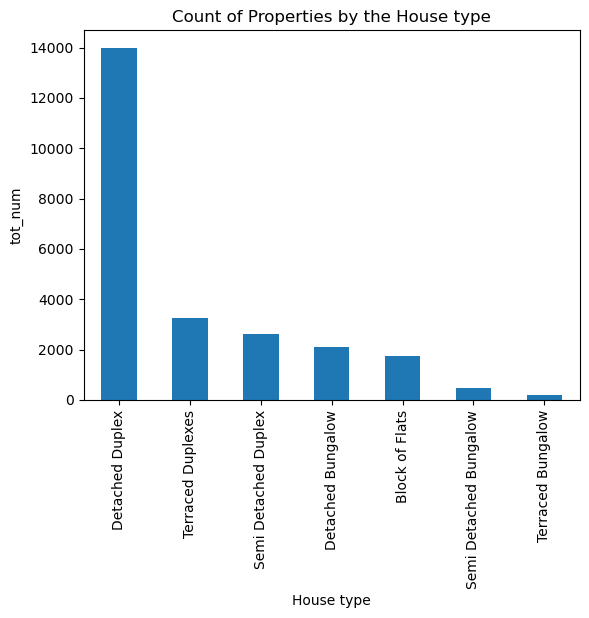

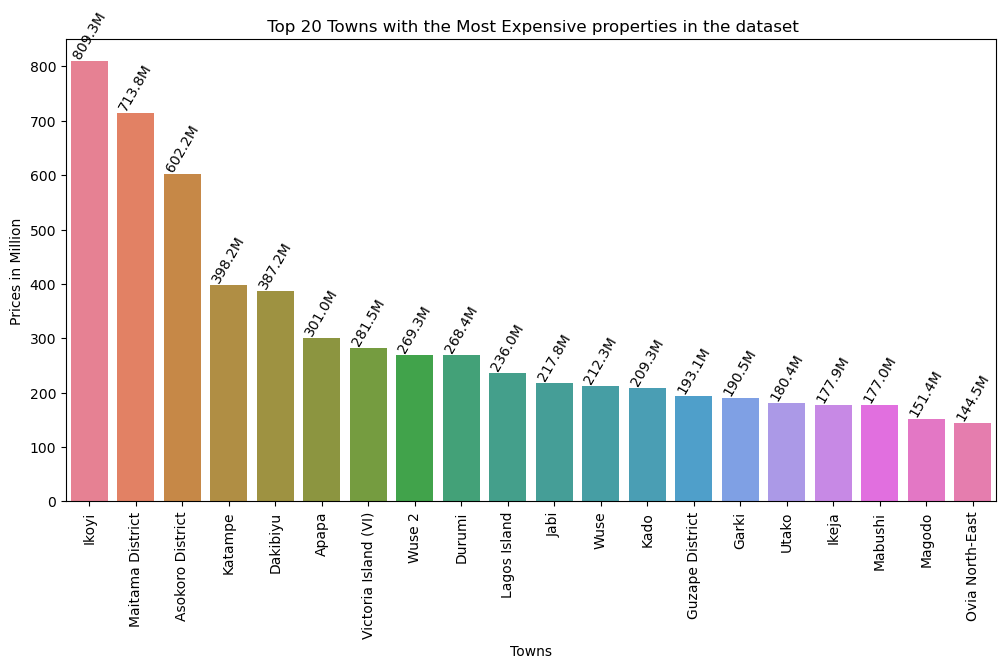

In [14]:
data['title'].value_counts().plot.bar()
plt.xlabel('House type')
plt.ylabel('tot_num')
plt.title('Count of Properties by the House type')
plt.show()


# Group the data by town and calculate the average price in millions
average_price = (data.groupby("town")['price']
                 .mean() / 1e6).sort_values(ascending=False).head(20)

# Set the color palette
colors = sns.color_palette('husl', len(average_price))

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price.index, y=average_price.values, palette=colors)
for i, value in enumerate(average_price.values):
    plt.text(i, value, f'{value:.1f}M', ha='center', va='bottom',rotation= 60)

plt.xlabel('Towns')
plt.ylabel('Prices in Million')
plt.title(' Top 20 Towns with the Most Expensive properties in the dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()







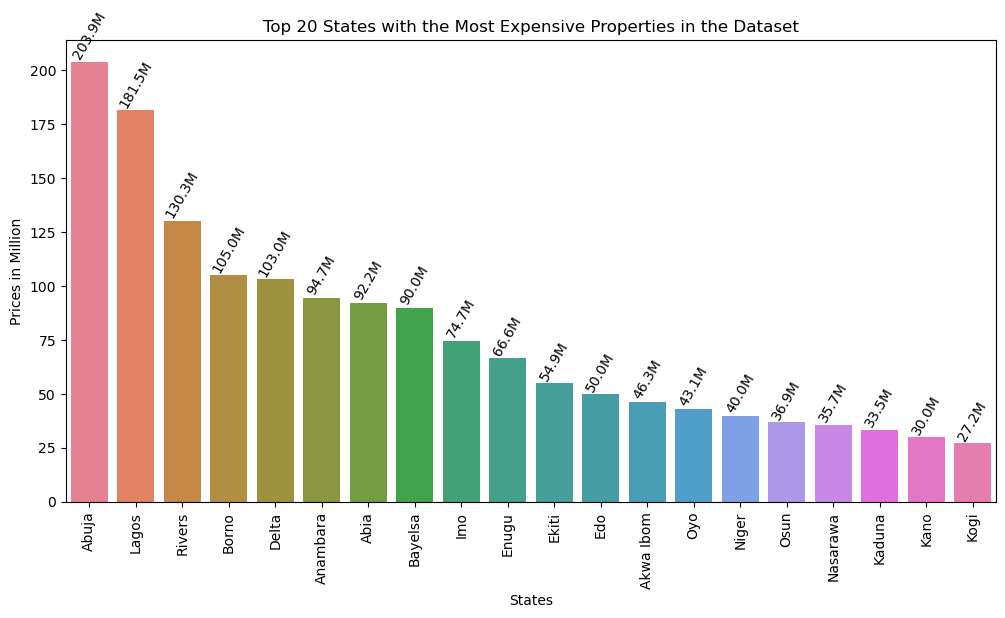

In [15]:


# Group the data by state and calculate the average price in millions
average_price = (data.groupby("state")['price']
                 .mean() / 1e6).sort_values(ascending=False).head(20)

# Set the color palette
colors = sns.color_palette('husl', len(average_price))

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price.index, y=average_price.values, palette=colors)
for i, value in enumerate(average_price.values):
    plt.text(i, value, f'{value:.1f}M', ha='center', va='bottom', rotation= 60)

plt.xlabel('States')
plt.ylabel('Prices in Million')
plt.title('Top 20 States with the Most Expensive Properties in the Dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


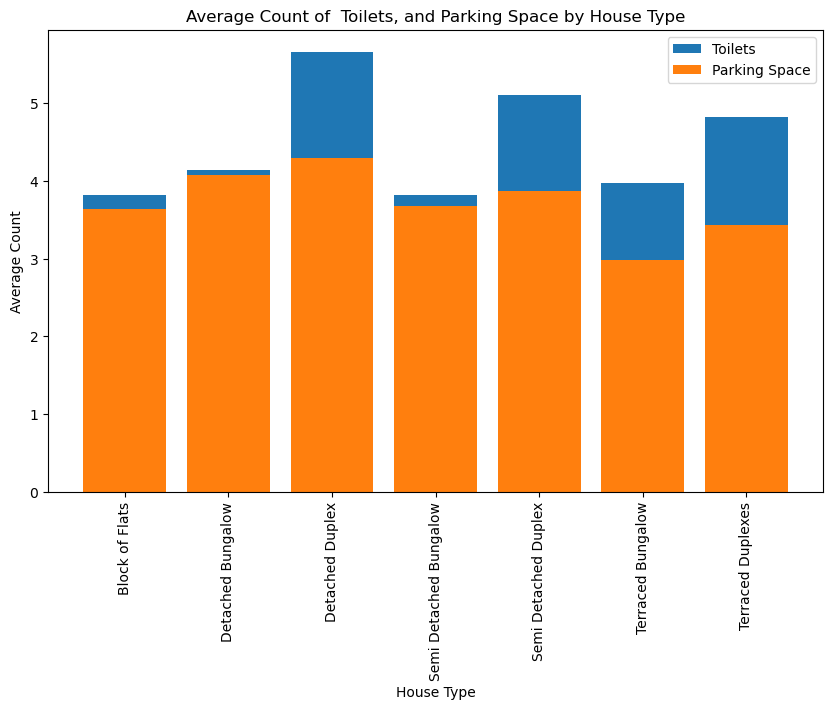

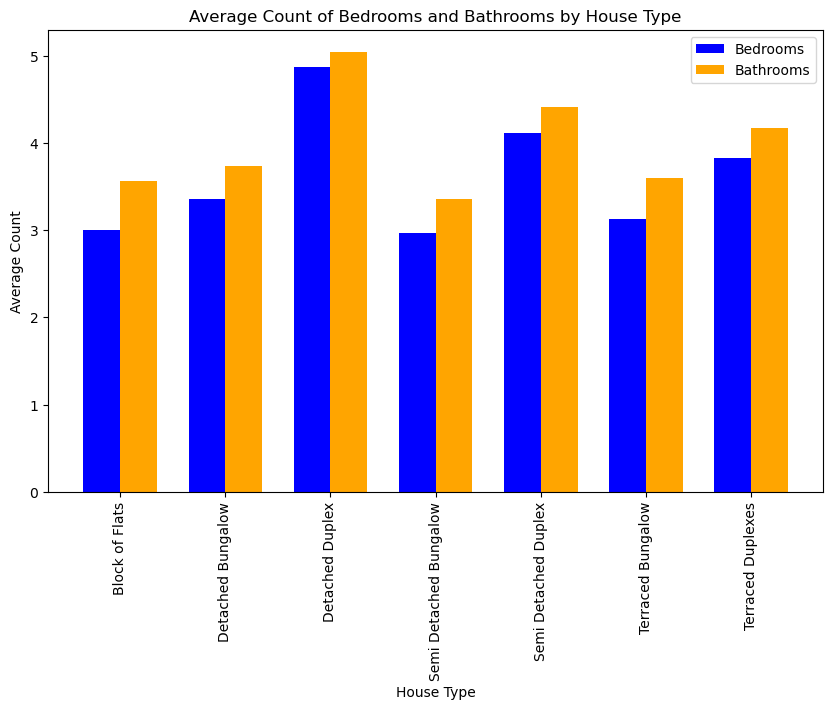

In [16]:

# Plotting the average values
plt.figure(figsize=(10, 6))

plt.bar(grouped_data['title'], grouped_data['toilets'], label='Toilets')
plt.bar(grouped_data['title'], grouped_data['parking_space'], label='Parking Space')

plt.xlabel('House Type')
plt.ylabel('Average Count')
plt.title('Average Count of  Toilets, and Parking Space by House Type')
plt.xticks(rotation=90)
plt.legend()
# Show the plot
plt.show()




# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(len(grouped_data['title']))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bars
plt.figure(figsize=(10, 6))
plt.bar(r1, grouped_data['bedrooms'], color='blue', width=bar_width, label='Bedrooms')
plt.bar(r2, grouped_data['bathrooms'], color='orange', width=bar_width, label='Bathrooms')

plt.xlabel('House Type')
plt.ylabel('Average Count')
plt.title('Average Count of Bedrooms and Bathrooms by House Type')
plt.xticks([r + bar_width/2 for r in range(len(grouped_data['title']))], grouped_data['title'], rotation=90)
plt.legend()

# Show the plot
plt.show()



               bedrooms  bathrooms   toilets  parking_space     price
bedrooms       1.000000   0.726305  0.611307       0.158430  0.206833
bathrooms      0.726305   1.000000  0.719920       0.174038  0.167686
toilets        0.611307   0.719920  1.000000       0.225226  0.156942
parking_space  0.158430   0.174038  0.225226       1.000000  0.059001
price          0.206833   0.167686  0.156942       0.059001  1.000000


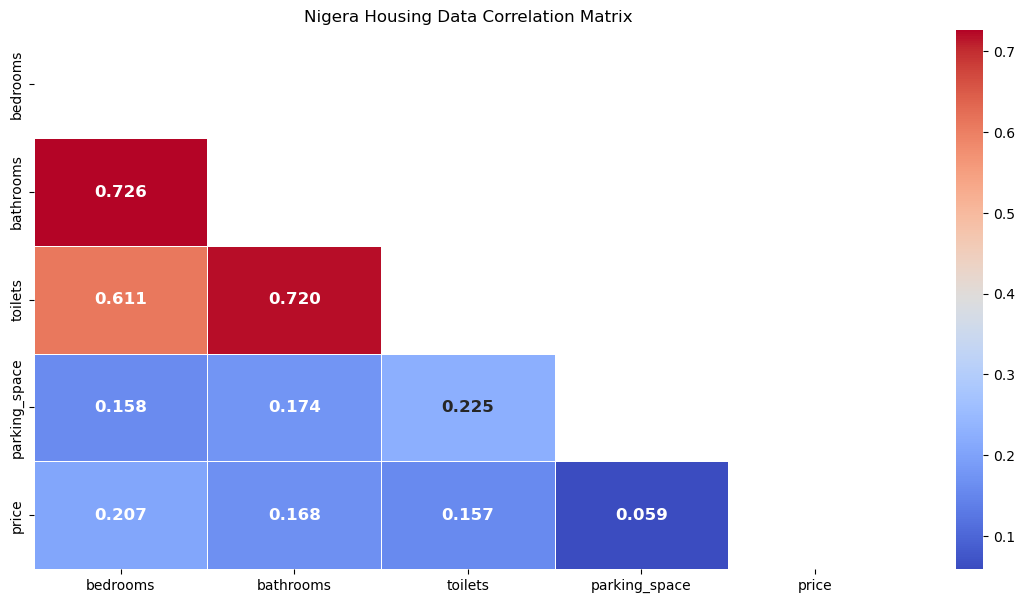

In [17]:
''' let Analyzing Relationships and Correlations:

 we first take a look at the correletion matrix of the data'''

plt.figure(figsize=(14,7))
correlation_matrix= data[['bedrooms', 'bathrooms', 'toilets', 'parking_space','price']].corr()
print (correlation_matrix)

sns.heatmap(data=correlation_matrix, annot= True, annot_kws={'fontsize': 12,'fontweight': 'bold'} , linewidth=0.5, fmt='0.3f', mask= np.triu(np.ones_like(correlation_matrix)),cmap= 'coolwarm')
plt.title('Nigera Housing Data Correlation Matrix')
plt.show()